<a href="https://colab.research.google.com/github/tandat-1305/Data-Analysis-with-Python/blob/main/Do_an_PTNN_Py/Thong_ke_mo_ta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Thư viện
import numpy as np
import pandas as pd
import statistics as sta
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from scipy import stats

In [ ]:
def hist_plot(data):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std),color='red')
    plt.hist(data, edgecolor='black', density = True,color='blue')
    plt.title(column)
    plt.show()
def bar_chart(data):
    plt.title(column)
    plt.show()



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tandat-1305/Data-Analysis-with-Python/main/Do_an_PTNN_Py/Inc_Exp_Data.csv')


In [ ]:
df.shape

(50, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [ ]:
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [ ]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


Text(0, 0.5, 'Count')

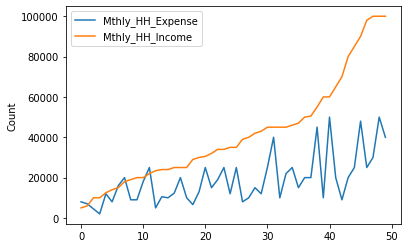

In [ ]:
#Biểu đồ tương quan giữa Mthly_HH_Expense và Mthly_HH_Income
df[["Mthly_HH_Expense",
    "Mthly_HH_Income"]].plot()
plt.ylabel('Count')

# Kiểu định lượng

In [ ]:
dinh_luong = {}
columns_dluong = ['Mthly_HH_Income',
                  'Mthly_HH_Expense',
                  'Emi_or_Rent_Amt',
                  'Annual_HH_Income']
for column in columns_dluong:
    print(column)
    mo_ta = df[column].describe()
    print(mo_ta)
    dinh_luong[column] = df[column]
    print('')

Mthly_HH_Income
count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

Mthly_HH_Expense
count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

Emi_or_Rent_Amt
count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64

Annual_HH_Income
count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64



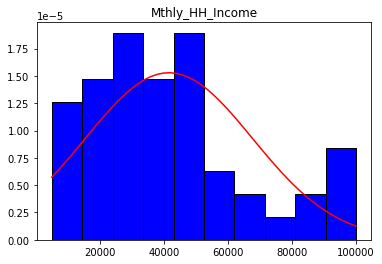

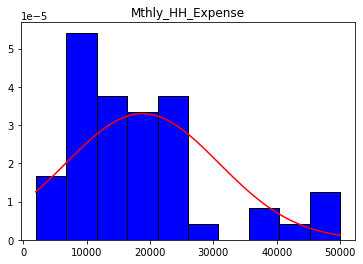

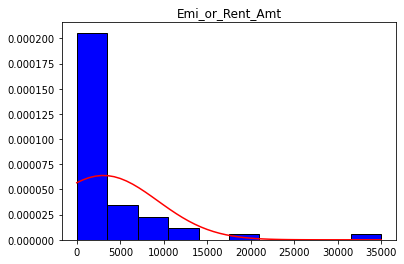

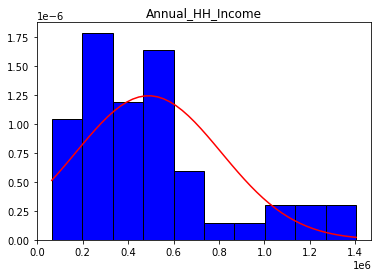

In [ ]:
data_d_luong = pd.DataFrame(dinh_luong)
for column in data_d_luong.columns:
    data = data_d_luong[column]
    hist_plot(data)

Biểu đồ định lượng

# Kiểu định tính

In [ ]:
dinh_tinh = {}
columns_dtinh = ['No_of_Fly_Members',
                 'Highest_Qualified_Member',
                 'No_of_Earning_Members']
for column in columns_dtinh:
    print(column)
    dinh_tinh[column] = df[column]
    print('')

No_of_Fly_Members

Highest_Qualified_Member

No_of_Earning_Members



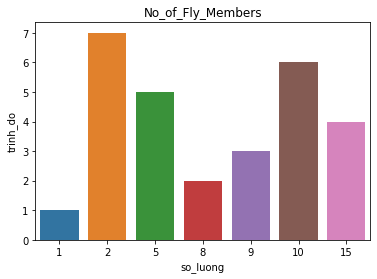

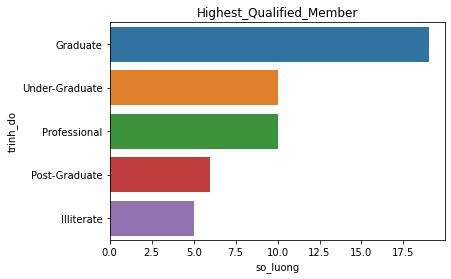

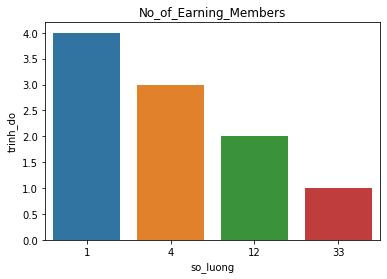

In [ ]:
for column in data_dinh_tinh.columns:
    p = {}
    so_luong = []
    dem_data = data_dinh_tinh[column].value_counts()
    trinh_do = dem_data.index
    for i in dem_data:
        so_luong.append(i)
    p = {'trinh_do':trinh_do,
         'so_luong':so_luong}
    data = pd.DataFrame(p)
    sns.barplot(y = 'trinh_do',
                x= 'so_luong',
                data = data)
    bar_chart(data)

# Distribution


#thống kê phần trăm thu nhập ở các mức rất cao, cao, trung bình, thấp


In [ ]:
type_income = []
for x in df['Mthly_HH_Income']:
    if x <= 20000:
        type_income.append('Thấp')
    elif x <= 50000:
        type_income.append('Trung bình')
    elif x <= 80000:
        type_income.append('Cao')
    else:
        type_income.append('Rất cao')
df.insert(7, "Type_Income", type_income)
df.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp
5,14000,8000,2,0,196560,Graduate,1,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp
7,18000,20000,5,8000,216000,Graduate,1,Thấp
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp


In [ ]:
#Rất cao >= 80000$ , Cao >= 50000$ , Trung bình >= 20000$, Thấp < 20000$
ti = df.groupby('Type_Income')['Type_Income'].count()
ti = pd.DataFrame(ti)
ti.columns = ['%']
phantram1 = (ti/sum(ti['%']))*100
phantram1

,%
Type_Income,
Cao,14.0
Rất cao,12.0
Thấp,22.0
Trung bình,52.0


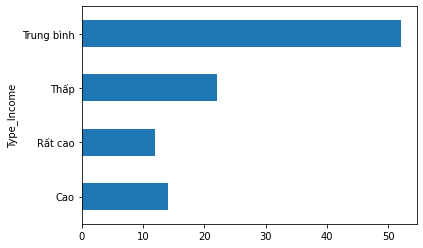

In [ ]:
type_2['%'].plot(x="Type_Income",
                 y="%",
                 kind="barh")
plt.show()

#thống kê phần trăm chi tiêu ở các mức rất cao, cao, trung bình, thấp

In [ ]:
type_expense = []

for x in df['Mthly_HH_Expense']:
    if x <= 8000:
        type_expense.append('Thấp')
    elif x <= 20000:
        type_expense.append('Trung bình')
    elif x <= 40000:
        type_expense.append('Cao')
    else:
        type_expense.append('Rất cao')
df.insert(8, "Type_Expense", type_expense)
df.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình


In [ ]:
te = df.groupby('Type_Expense')['Type_Expense'].count()
te = pd.DataFrame(te)
te.columns = ['%']
phantram2 = (te/sum(te['%']))*100
phantram2

,%
Type_Expense,
Cao,24.0
Rất cao,8.0
Thấp,16.0
Trung bình,52.0


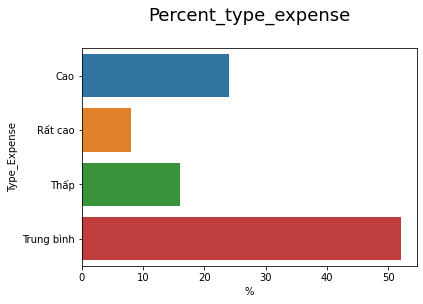

In [ ]:
phantram2.reset_index(inplace=True)
sns.barplot(y='Type_Expense',
            x='%',
            data = phantram2 )
plt.title('Percent_type_expense',
          color = 'black',
          y = 1.1,
          fontsize = 18)
plt.show()

#Bảng thống kê chi phí nộp thêm hằng năm


In [ ]:
chi_nam = df.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
chi_nam = pd.DataFrame(EoRA)
chi_nam.columns = ['%']
phantram_nam = chi_nam/sum(chi_nam['%'])*100
phantram_nam

,%
Emi_or_Rent_Amt,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


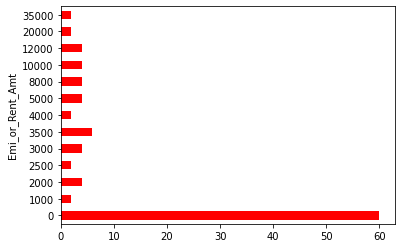

In [ ]:
phantram_nam['%'].plot(x="Emi_or_Rent_Amt",
                       y="%",kind="barh",
                       color='red')
